# 가상의 데이터를 만들어 본다

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame(columns = ['LOT_ID', 'SLOT_ID', 'SITE', 'PARA_NAME', 'PARA_VALUE'])

rowid = 0;
lotlist = ['LOT'+str(i)  for i in range(10)]
paralist = ['PARA'+str(i)  for i in range(5)]

for lot in lotlist:
    print(lot, end = ',')
    for slot in range(1, 10):
        for site in range(1,22):
            for para in paralist:
                data = np.random.randn() * 10
                df.loc[rowid] = [lot, slot, site, para, data]
                rowid += 1

LOT0,LOT1,LOT2,LOT3,LOT4,LOT5,LOT6,LOT7,LOT8,LOT9,

In [4]:
df2 = pd.pivot_table(df, index = ['LOT_ID', 'SLOT_ID', 'SITE'], columns = 'PARA_NAME', values = 'PARA_VALUE')
df2.reset_index(inplace = True)

In [5]:
# Unique 한 LOT_ID 목록을 가져온다
lotlist = df2['LOT_ID'].unique()

# 
tmpDf = pd.DataFrame(lotlist, columns = ['LOT_ID'])
tmpDf['label'] = 'FAIL'
tmpDf.head()

tmpDf.loc[2, 'label'] = 'UNKNOWN'
tmpDf.loc[3, 'label'] = 'UNKNOWN'
tmpDf.loc[4, 'label'] = 'PASS'

In [6]:
df3 = pd.merge(df2, tmpDf, how = 'inner', on = 'LOT_ID')
df3.head()

,LOT_ID,SLOT_ID,SITE,PARA0,PARA1,PARA2,PARA3,PARA4,label
0,LOT0,1,1,9.591634,-10.905767,-8.665648,12.643157,6.775051,FAIL
1,LOT0,1,2,-1.104898,-23.886273,-8.219786,-5.987490,13.442875,FAIL
2,LOT0,1,3,-5.865516,-13.957807,-3.178514,10.968616,-1.734331,FAIL
3,LOT0,1,4,8.210090,10.257199,-21.435733,0.398075,15.531988,FAIL
4,LOT0,1,5,0.792499,-11.979063,9.461074,-10.472194,1.158846,FAIL


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

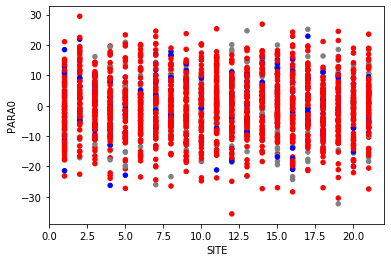

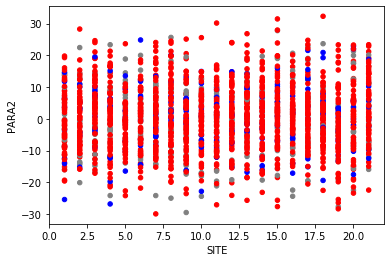

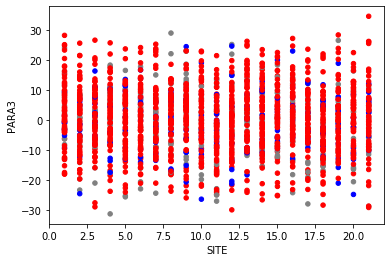

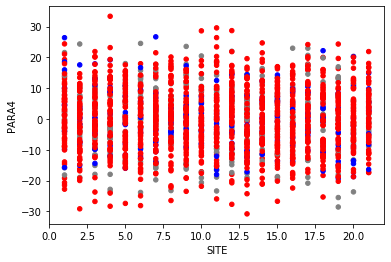

In [8]:
colors = {'FAIL':'red', 'PASS':'blue', 'UNKNOWN':'gray'}

paralist = ['PARA0', 'PARA2', 'PARA3', 'PARA4']
for para in paralist:
    df3.plot.scatter('SITE', para, c = df3['label'].apply(lambda x: colors[x]))